In [ ]:
!pip -q install langchain huggingface_hub openai google-search-results tiktoken chromadb rank_bm25 faiss-cpu

In [ ]:
import os
from google.colab import userdata
os.environ["OPENAI_API_KEY"] = userdata.get("open_ai_api_key")

In [ ]:
!pip show langchain

Name: langchain
Version: 0.1.14
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, async-timeout, dataclasses-json, jsonpatch, langchain-community, langchain-core, langchain-text-splitters, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: 


In [ ]:
from langchain import retrievers

In [ ]:
dir(retrievers)

['Any',
 'ContextualCompressionRetriever',
 'EnsembleRetriever',
 'LangChainDeprecationWarning',
 'MergerRetriever',
 'MultiQueryRetriever',
 'MultiVectorRetriever',
 'OutlineRetriever',
 'ParentDocumentRetriever',
 'RePhraseQueryRetriever',
 'SelfQueryRetriever',
 'TimeWeightedVectorStoreRetriever',
 'WebResearchRetriever',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'contextual_compression',
 'document_compressors',
 'ensemble',
 'is_interactive_env',
 'merger_retriever',
 'multi_query',
 'multi_vector',
 'outline',
 'parent_document_retriever',
 're_phraser',
 'self_query',
 'time_weighted_retriever',
 'warnings',
 'web_research']

In [ ]:
from langchain.retrievers import BM25Retriever, EnsembleRetriever
from langchain.schema import Document

from langchain.vectorstores import Chroma

from langchain.embeddings.openai import OpenAIEmbeddings
embedding = OpenAIEmbeddings()

In [ ]:
doc_list = [
    "My favourite sports is Cricket",
    "My favourite player is MS Dhoni",
    "MS Dhoni is an invester too.",
    "Football is the most popular sports",
    "Hockey is the national sports of India"
]

#BM25 Retriever

In [ ]:
# initialize the bm25 retriever and faiss retriever
bm25_retriever = BM25Retriever.from_texts(doc_list)
bm25_retriever.k = 2

In [ ]:
bm25_retriever.get_relevant_documents("Sports")

[Document(page_content='Hockey is the national sports of India'),
 Document(page_content='Football is the most popular sports')]

In [ ]:
bm25_retriever.get_relevant_documents("MS Dhoni")

[Document(page_content='MS Dhoni is an invester too.'),
 Document(page_content='My favourite player is MS Dhoni')]

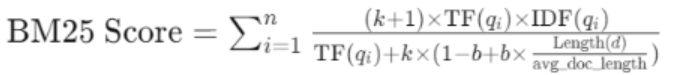

#Chroma Retreiver

In [ ]:
chroma_vectorstore = Chroma.from_texts(doc_list, embedding)
chroma_retriever = chroma_vectorstore.as_retriever(search_kwargs={"k": 2})

In [ ]:
chroma_retriever.get_relevant_documents("Sports")

[Document(page_content='Football is the most popular sports'),
 Document(page_content='My favourite sports is Cricket')]

#Ensemble Retriever

In [ ]:
# initialize the ensemble retriever
ensemble_retriever = EnsembleRetriever(retrievers=[bm25_retriever, chroma_retriever],
                                       weights=[0.5, 0.5])

In [ ]:
docs = ensemble_retriever.get_relevant_documents("Sports")
docs

[Document(page_content='Football is the most popular sports'),
 Document(page_content='Hockey is the national sports of India'),
 Document(page_content='My favourite sports is Cricket')]

In [ ]:
docs = ensemble_retriever.get_relevant_documents("MS Dhoni")
docs

[Document(page_content='MS Dhoni is an invester too.'),
 Document(page_content='My favourite player is MS Dhoni')]